Epoch 1/20
10/10 [==============================] - 2s 21ms/step - loss: 1.7832 - accuracy: 0.3474 - val_loss: 1.7277 - val_accuracy: 0.2800
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 1.6835 - accuracy: 0.4632 - val_loss: 1.6409 - val_accuracy: 0.2800
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 1.6025 - accuracy: 0.5053 - val_loss: 1.5654 - val_accuracy: 0.2800
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 1.5441 - accuracy: 0.4316 - val_loss: 1.4961 - val_accuracy: 0.2800
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 1.4481 - accuracy: 0.5789 - val_loss: 1.4329 - val_accuracy: 0.4400
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 1.3953 - accuracy: 0.5895 - val_loss: 1.3704 - val_accuracy: 0.6400
Epoch 7/20
10/10 [==============================] - 0s 9ms/step - loss: 1.3496 - accuracy: 0.6211 - val_loss: 1.3104 - val_accuracy: 0.6400
Epoch 8/20
10/10 [=

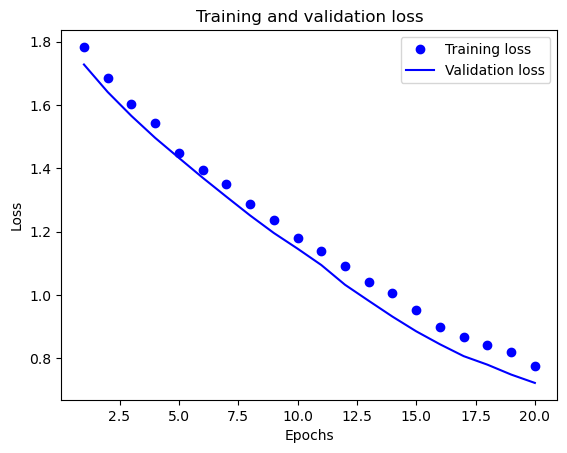

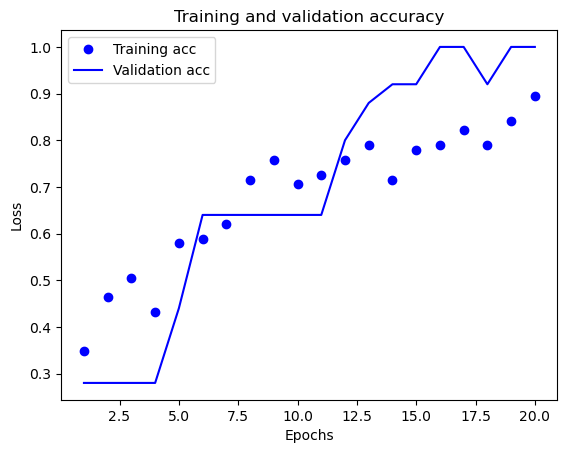

Test loss: 0.6924996972084045
Test accuracy: 0.9666666388511658


In [178]:
'''
Girish Rajani-Bathija
A20503736
CS 577 - F22
Assignment 3 Multi Class Classification
'''

from keras.utils.np_utils import to_categorical
from keras import models, layers, optimizers
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.regularizers import l1_l2, l1, l2
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Load iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

def load_iris_data(url):
    dataframe = pd.read_csv(url, header=None)
    X = dataframe.iloc[:,0:4]
    Y = dataframe.iloc[:,4]
    train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=123)
    return train_data, test_data, train_labels, test_labels

train_data, test_data, train_labels, test_labels = load_iris_data(url)

#normalize training and testing data
train_data = preprocessing.normalize(train_data)
test_data = preprocessing.normalize(test_data)

#encode and vectorize labels using label encoder and categorical encoding
lbl_encoder = LabelEncoder()
train_labels_encoded = lbl_encoder.fit_transform(train_labels)
test_labels_encoded = lbl_encoder.fit_transform(test_labels)

one_hot_train_labels = to_categorical(train_labels_encoded)
one_hot_test_labels = to_categorical(test_labels_encoded)


#Build the network
model = models.Sequential()
#model.add(layers.Dense(64, activation='relu', input_shape=(4,)))
#model.add(layers.Dense(64, activation='relu'))

#Batch Normalization
'''model.add(BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None
))'''

#Weight decay regularization:
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), input_shape=(4,)))
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

#model.add(layers.Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(4,)))
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=l1(0.01)))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(4,)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

#Dropout:
model.add(Dropout(0.4))

model.add(layers.Dense(3, activation='softmax'))


#Optimizers
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0, decay=0.0, nesterov=False)
rmsprop = optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad = optimizers.Adagrad(learning_rate=0.01, epsilon=None, decay=0.0)
adadelta = optimizers.Adadelta(learning_rate=1.0, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax = optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

#Losses
categorical_crossentropy_loss = keras.losses.CategoricalCrossentropy()
sparse_categorical_crossentropy_loss = keras.losses.SparseCategoricalCrossentropy()
kl = tf.keras.losses.KLDivergence()


#Compile the model using optimizer and loss function
model.compile(optimizer= adam,
              loss= categorical_crossentropy_loss,
              metrics=['accuracy'])


#Create validation set from training data
x_val = train_data[:25]
partial_train_data = train_data[25:]
y_val = one_hot_train_labels[:25]
partial_train_labels = one_hot_train_labels[25:]

history = model.fit(partial_train_data, partial_train_labels,
epochs=20, batch_size=10,
validation_data=(x_val, y_val))

#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy of final model
loss, accuracy = model.evaluate(test_data, one_hot_test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)